### For daily data processing, see the final script at:

/pic/projects/next_gen_idf/chen423/misc_work/pet_project/Duan_short/tools/compute_daily_counts_regime_yearmonth.py

In [1]:
import numpy as np
import scipy.io as sio

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches

%matplotlib inline

In [10]:
def crt_MeteoSwiss_colormap(cmapname):
    
    full_info = {'hotcold':['#181870', '#104e8b', '#1774cd', '#4876ff', '#5baced', '#add7e6', '#d1eded', '#e5eff9', '#f2ffff', '#ffffff', '#fdf5e6', '#ffe4b4', '#f3a460', '#ed7600', '#cd661d', '#e0310f', '#ed0000', '#cd0000', '#8b0000'],
                 'hotcolr':['#000032', '#181870', '#104e8b', '#1774cd', '#4876ff', '#5baced', '#add7e6', '#d1eded', '#e5eff9', '#f2ffff', '#fdf5e6', '#ffe4b4', '#f3a460', '#ed7600', '#cd661d', '#e0310f', '#ed0000', '#cd0000', '#8b0000', '#320000'],
                 'mch':['#ffffff', '#000000', '#202020', '#404040', '#606060', '#808080', '#a0a0a0', '#c0c0c0', '#e0e0e0', '#ff0000', '#00ff00', '#0000ff', '#ffff00', '#00ffff', '#ff00ff'],
                 'perc2':['#d7e3ee', '#b5caff', '#8fb3ff', '#7f97ff', '#abcf63', '#e8f59e', '#fffa14', '#ffd121', '#ffa30a', '#ff4c00'],
                 'percent':['#640096', '#2730d7', '#598dfc', '#8befd9', '#60cf91', '#1a9850', '#91cf60', '#d9ef8b', '#fee08b', '#fc8d59', '#d73027', '#960064'],
                 'precip1':['#ffffff', '#edfac2', '#cdffcd', '#99f0b2', '#53bd9f', '#32a696', '#3296b4', '#0570b0', '#05508c', '#0a1f96', '#2c0246', '#6a2c5a'],
                 'precip2_15':['#ffffff', '#640064', '#af00af', '#dc00dc', '#3232c8', '#0064ff', '#009696', '#00c832', '#64ff00', '#96ff00', '#c8ff32', '#ffff00', '#ffc800', '#ffa000', '#ff7d00', '#e11900'],
                 'precip2_17':['#ffffff', '#ebf6ff', '#d6e2ff', '#b5c9ff', '#8eb2ff', '#7f96ff', '#7285f8', '#6370f8', '#009e1e', '#3cbc3d', '#b3d16e', '#b9f96e', '#fff913', '#ffa309', '#e50000', '#bd0000', '#810000', '#000000'],
                 'precip3':['#ffffff', '#d6e2ff', '#b5c9ff', '#8eb2ff', '#7f96ff', '#6370f7', '#0063ff', '#009696', '#00c633', '#63ff00', '#96ff00', '#c6ff33', '#ffff00', '#ffc600', '#ffa000', '#ff7c00', '#ff1900'],
                 'precip4':['#fefefe', '#dffff9', '#9ad9ca', '#67c2a3', '#40ad75', '#32a696', '#5aa0cd', '#4292c7', '#4c8dc4', '#072f6b', '#071e46', '#4c0073'],
                 'precip4_diff':['#6b2107', '#b53b21', '#c75542', '#cd695a', '#a63237', '#ad4058', '#c26772', '#d99a9f', '#ffdfe0', '#fefefe', '#fefefe', '#dffff9', '#9ad9ca', '#67c2a3', '#40ad75', '#32a696', '#5aa0cd', '#4292c7', '#4c8dc4', '#072f6b'],
                 'precip1_diff_12':['#b66a28', '#cd853f', '#e1a564', '#f5cd84', '#f5e09e', '#fff5ba', '#ffffff', '#cdffcd', '#99f0b2', '#53bd9f', '#6eaac8', '#0570b0', '#023858'],
                 'precip1_diff_1':['#53bd9f', '#e1a564'],
                 'spread':['#ffffff', '#ffe1e1', '#ffd2d2', '#ffa5a5', '#ff7878', '#ff4b4b', '#ff0000', '#ff6400', '#ff9600', '#ffc800', '#ffff00', '#8cff00', '#00ff00', '#00cd5f', '#0091c8', '#0000ff'],
                 'sunshine':['#ffffff', '#fff5cc', '#ffe670', '#ffcc33', '#ffaf33', '#ff9933', '#ff6f33', '#ff5500', '#e6281e', '#c81e14'],
                 'sunshine_diff':['#510979', '#950fdf', '#b74bf3', '#cb7ef6', '#e1b4fa', '#ecd0fc', '#ffffff', '#fff5cc', '#ffe670', '#ffcc33', '#ffaf33', '#ff6f00', '#e6281e'],
                 't2m':['#6de3ff', '#aff0ff', '#ffc4e2', '#ff99cc', '#ff00ff', '#800080', '#000080', '#4646ff', '#3366ff', '#85a2ff', '#ffffff', '#cccccc', '#b3b3b3', '#999999', '#606060', '#808000', '#005c00', '#008000', '#339966', '#9dd500', '#d4ff5b', '#ffff00', '#ffb870', '#ff9900', '#ff6600', '#ff0000', '#bc4b00', '#ab0038', '#800000', '#a370ff'],
                 'temp':['#071e46', '#072f6b', '#08529c', '#2171b5', '#4292c7', '#5aa0cd', '#78bfd6', '#aadce6', '#dbf5ff', '#f0fcff', '#fff0f5', '#ffe0e0', '#fcbbaa', '#fc9272', '#fb6a4a', '#f03c2b', '#cc181e', '#a60f14', '#780a0f', '#5f0000'],
                 'temp_diff_18':['#071e46', '#072f6b', '#08579c', '#2171b5', '#4292c7', '#5aa0cd', '#78bfd6', '#aadce6', '#dbf5ff', '#ffffff', '#ffe0e0', '#fcbbaa', '#fc9272', '#fb6a4a', '#f03c2b', '#cc181e', '#a60f14', '#780a0f', '#5f0000'],
                 'temp_diff_1':['#f03c2b', '#2171b5'],
                 'topo':['#28369a', '#00c932', '#1ed368', '#5ee074', '#a2eb82', '#dff892', '#f6e595', '#c8b276', '#a27e5e', '#8f6154', '#a27d74', '#b2968b', '#c7b0aa', '#dbcdca', '#ece4e2', '#ffffff'],
                 'wind':['#ffffff', '#eff4d1', '#e8f49e', '#aace63', '#e2ed16', '#ffed00', '#ffed82', '#f4d17f', '#eda549', '#e58c3d', '#db7c3d', '#ef073d', '#e856a3', '#9b70a8', '#6370f7', '#7f96ff', '#8eb2ff', '#b5c9ff'],
                 'demo':'Here is a list of the colormaps:\n  hotcold\n  hotcolr\n  mch\n  perc2\n  percent\n  precip1\n  precip2_15\n  precip2_17\n  precip3\n  precip4\n  precip4_diff\n  precip_diff_12\n  precip_diff_1\n  spread\n  sunshine\n  sunshine_diff\n  t2m\n  temp\n  temp_diff_18\n  temp_diff_1\n  topo\n  wind',
                }
    if cmapname=='demo':
        print(full_info.get('demo'))
    else:
        return matplotlib.colors.ListedColormap(full_info.get(cmapname))

## 1. retrieve the data

In [7]:
infile = 'data/Sci_Social_demo-02.data.mat'

xarray = sio.loadmat(infile)['xarray'][0]
yarray = sio.loadmat(infile)['yarray'][0]
regime_count_log = sio.loadmat(infile)['regime_count_log']
Tarray = sio.loadmat(infile)['Tarray'][0]
Parray = sio.loadmat(infile)['Parray'][0]
T_dim_count_norm = sio.loadmat(infile)['T_dim_count_norm']
P_dim_count_norm = sio.loadmat(infile)['P_dim_count_norm']

In [3]:
colors5 = ['whitesmoke', 'purple', 'orange', 'lightseagreen', 'royalblue']
cm5 = LinearSegmentedColormap.from_list('xc_5colors', colors5, N=5)
vmin5 = -0.5
vmax5 = 4.5

colors4 = colors5[1:5]
cm4 = LinearSegmentedColormap.from_list('xc_4colors', colors4, N=4)

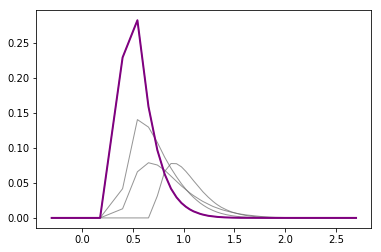

<Figure size 432x288 with 0 Axes>

In [8]:
i=1
plt.figure()

for k in np.arange(1,5):
    plt.plot(np.log10(Parray), P_dim_count_norm[:,k], color='dimgrey', linewidth=1, alpha=0.7)
plt.plot(np.log10(Parray), P_dim_count_norm[:,i], color=colors5[i], linewidth=2)

plt.show()
plt.clf()

## 2. make a plot

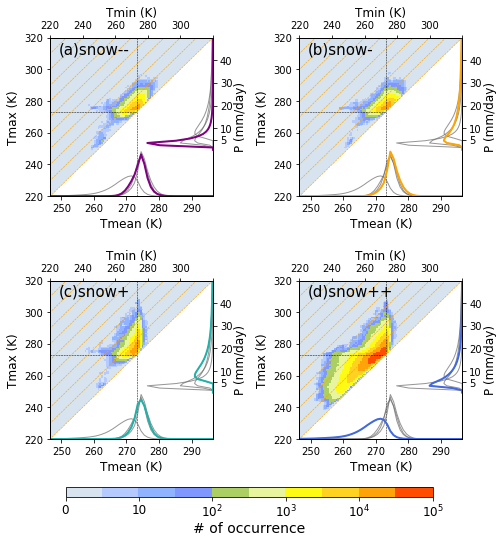

In [11]:
cmap = crt_MeteoSwiss_colormap('perc2')

fig1 = plt.figure(figsize=(8.5,8.5))

ax1 = plt.subplot2grid((23, 23), (0,0), rowspan=8, colspan=8)
ax2 = plt.subplot2grid((23, 23), (0,12), rowspan=8, colspan=8)
ax3 = plt.subplot2grid((23, 23), (12,0), rowspan=8, colspan=8)
ax4 = plt.subplot2grid((23, 23), (12,12), rowspan=8, colspan=8)

axis_group = [ax1, ax2, ax3, ax4]
strings = ['(a)snow--', '(b)snow-', '(c)snow+', '(d)snow++']

triangle_patch = matplotlib.patches.Polygon(np.array([[220,220],[320,320],[320,220],[220,220]]), facecolor='white')

for i in np.arange(1,5):
    axis = axis_group[i-1]
    axis.set_facecolor('whitesmoke')
    axis.pcolormesh(yarray, xarray, regime_count_log[:,:,i], cmap=cmap, vmin=0, vmax=6)
    axis.set_xlim([220,320])
    axis.set_ylim([220,320])
    axis.plot([273.15, 273.15], [220,330], linestyle='--', color='black', linewidth=0.5)
    axis.plot([220,273.15], [273.15, 273.15], linestyle='--', color='black', linewidth=0.5)
    axis.text(225, 310, strings[i-1], ha='left', size=15)
    for dt in np.arange(0,130,10):
        axis.plot([200,330], [200+dt,330+dt], linestyle='--', color='orange', linewidth=0.6)
        #axis.text(200+dt, 325, str(dt), size=10)
    
    # modify the plot to include more information
    axis.xaxis.tick_top()
    axis.xaxis.set_label_position('top')
    axis.set_xticklabels([220,240,260,280,300])
    triangle_patch = matplotlib.patches.Polygon(np.array([[220,220],[320,320],[320,220],[220,220]]), facecolor='white')
    axis.add_patch(triangle_patch)
    
    # Tmean pdf curve
    sub_ax1 = axis.twinx().twiny()
    for k in np.arange(1,5):
        sub_ax1.plot(Tarray, T_dim_count_norm[:,k], color='dimgrey', linewidth=1, alpha=0.7)
    sub_ax1.plot(Tarray, T_dim_count_norm[:,i], color=colors5[i], linewidth=2)
    sub_ax1.set_xlim([273.15-(273.15-220)/2,273.15+(320-273.15)/2])
    sub_ax1.set_ylim([0, 0.8])
    sub_ax1.xaxis.tick_bottom()
    sub_ax1.xaxis.set_label_position('bottom')
    sub_ax1.set_yticks([])
    sub_ax1.set_xlabel('Tmean (K)', size=12)
        
    # P pdf curve
    sub_ax2 = axis.twinx().twiny()
    # this is intersting, if I use twinx.twiny, the new ylabel will not show up.
    # If I use twiny.twinx here, the sub_ax1's xlabel is messed up
    for k in np.arange(1,5):
        sub_ax2.plot(P_dim_count_norm[:,k], Parray, color='dimgrey', linewidth=1, alpha=0.7)
    sub_ax2.plot(P_dim_count_norm[:,i], Parray, color=colors5[i], linewidth=2)
    sub_ax2.set_xlim([0.7, 0])
    sub_ax2.set_ylim([-20, 50])
    sub_ax2.set_xticks([])
    sub_ax2.set_yticks([5, 10, 20, 30, 40])
    sub_ax2.text(-0.12,15, 'P (mm/day)', rotation=90, ha='center', va='center', size=12)

        
cbar_ax1 = fig1.add_axes([0.15, 0.13, 0.6, 0.015])
cb1 = matplotlib.colorbar.ColorbarBase(cbar_ax1, cmap=cmap,
                                       ticks=np.arange(0, 1.0001, 0.2), orientation='horizontal')
cb1.set_ticklabels([r'0', r'10', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$', r'$10^6$'])
cbar_ax1.tick_params(labelsize=12)
cbar_ax1.text(0.5, -3.5, '# of occurrence', ha='center', va='center', size=14)

#ax3.set_xticks([])
#ax4.set_xticks([])
#ax2.set_yticks([])
#ax4.set_yticks([])

for axis in [ax1,ax2,ax3,ax4]:
    axis.set_xlabel('Tmin (K)', size=12)
    axis.set_ylabel('Tmax (K)', size=12)

    
#fig1.savefig(rootdir+'plots/P2.5mm/fig2.hydro_regime.png', dpi=600)
plt.show()
fig1.clf()